<a href="https://colab.research.google.com/github/ATIK2110018/ML_projects/blob/main/cardiovascular_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/cardio_train.csv',sep=';')

In [ ]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
df.isnull().sum()

,0
id,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0


In [ ]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


(array([35021.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 34979.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

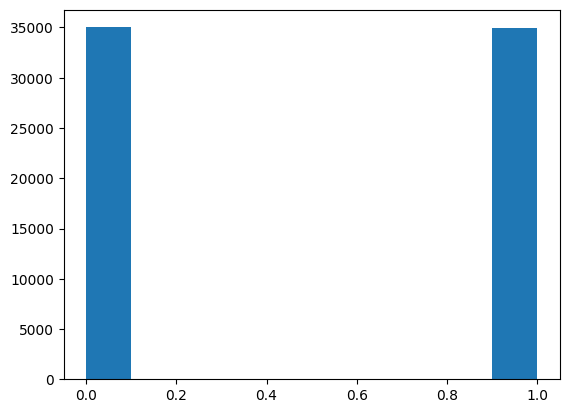

In [ ]:
plt.hist(df['cardio'])

<Axes: >

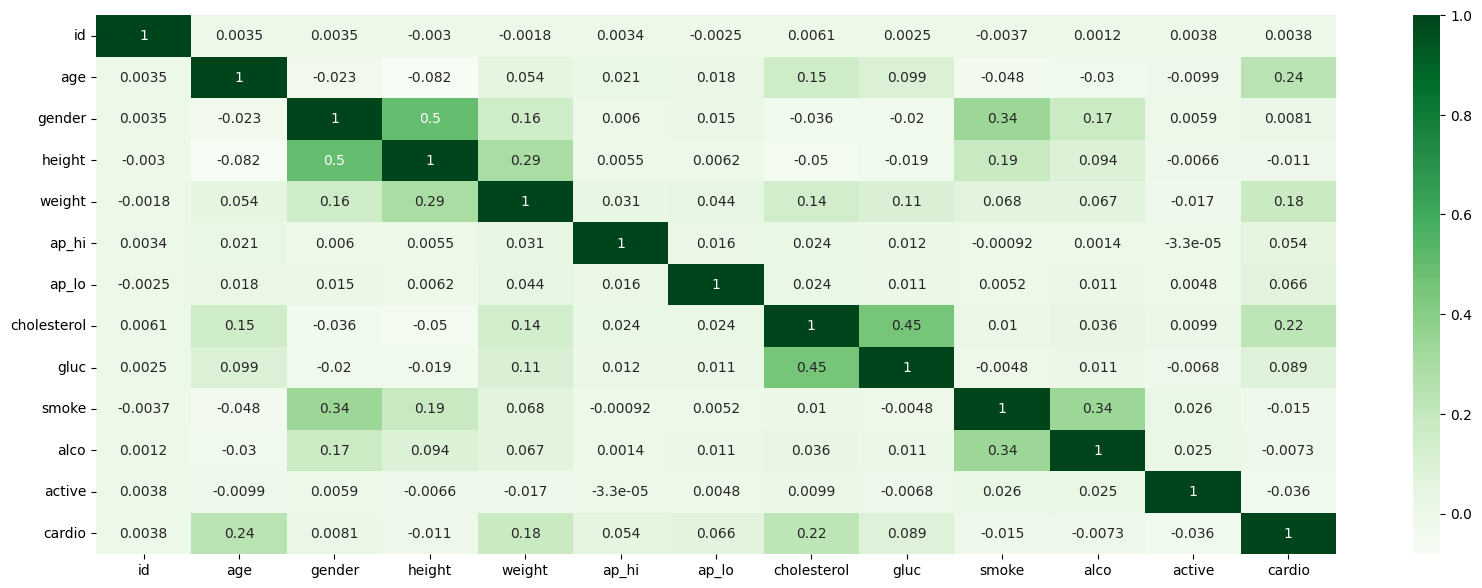

In [ ]:
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(),annot=True,cmap='Greens')

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
x=df.drop(columns=(['cardio','id']))

In [ ]:
y=df.cardio

In [ ]:
x.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,18393,2,168,62.0,110,80,1,1,0,0,1
1,20228,1,156,85.0,140,90,3,1,0,0,1
2,18857,1,165,64.0,130,70,3,1,0,0,0
3,17623,2,169,82.0,150,100,1,1,0,0,1
4,17474,1,156,56.0,100,60,1,1,0,0,0


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc=RandomForestClassifier()

In [ ]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
rfc.predict(x_test)

array([1, 1, 1, ..., 0, 1, 1])

In [ ]:
rfc.score(x_test,y_test)

0.7142857142857143

# Saving ml model using Joblib

In [ ]:
import joblib as jbl
jbl.dump(rfc,'Model1')

['Model1']

In [ ]:
## now claaing the model
model=jbl.load('Model1')

In [ ]:
model.predict(x_test)

array([1, 1, 1, ..., 0, 1, 1])

In [ ]:
model.score(x_test,y_test)

0.7142857142857143

# Hyper parameter tuning

# Feature selection


In [ ]:
# drom the above project where there are 13 features i will select 8 important features using univariate selection

In [ ]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [ ]:
fit_feature=SelectKBest(score_func=f_classif)

In [ ]:
fit_feature.fit(x,y)

SelectKBest()

In [ ]:
score_col=pd.DataFrame(fit_feature.scores_,columns=['score_values'])

In [ ]:
x_col=pd.DataFrame(x.columns)

In [ ]:
top_features=pd.concat([x_col,score_col],axis=1)

In [ ]:
top_features

,0,score_values
0,age,4209.007957
1,gender,4.603641
2,height,8.197397
3,weight,2388.777887
4,ap_hi,208.339524
5,ap_lo,303.629011
6,cholesterol,3599.361137
7,gluc,562.772977
8,smoke,16.790541
9,alco,3.761355


In [ ]:
top_features.nlargest(8,'score_values')

,0,score_values
0,age,4209.007957
6,cholesterol,3599.361137
3,weight,2388.777887
7,gluc,562.772977
5,ap_lo,303.629011
4,ap_hi,208.339524
10,active,89.091494
8,smoke,16.790541


In [ ]:
x_new=df[['age','weight','ap_hi','ap_lo','cholesterol','gluc','smoke','active']]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y,test_size=0.2,random_state=42)

In [ ]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
rfc.predict(x_test)

array([1, 1, 1, ..., 0, 1, 1])

In [ ]:
rfc.score(x_test,y_test)

0.6915714285714286

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree=DecisionTreeClassifier()

In [ ]:
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
tree.predict(x_test )

array([1, 1, 1, ..., 0, 1, 1])

In [ ]:
tree.score(x_test,y_test)    # something is going wrong the aacuracy should increase

0.6279285714285714

# Feature importance

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
model=ExtraTreesClassifier()

In [ ]:
model.fit(x,y)

ExtraTreesClassifier()

In [ ]:
importance=model.feature_importances_

In [ ]:
top=pd.Series(model.feature_importances_,index=x.columns)

In [ ]:
top

,0
age,0.288963
gender,0.005941
height,0.169943
weight,0.177888
ap_hi,0.179700
ap_lo,0.107986
cholesterol,0.046215
gluc,0.010947
smoke,0.003694
alco,0.004161


In [ ]:
top.nlargest(10)

,0
age,0.288963
ap_hi,0.179700
weight,0.177888
height,0.169943
ap_lo,0.107986
cholesterol,0.046215
gluc,0.010947
gender,0.005941
active,0.004560
alco,0.004161


<Axes: xlabel='None', ylabel='None'>

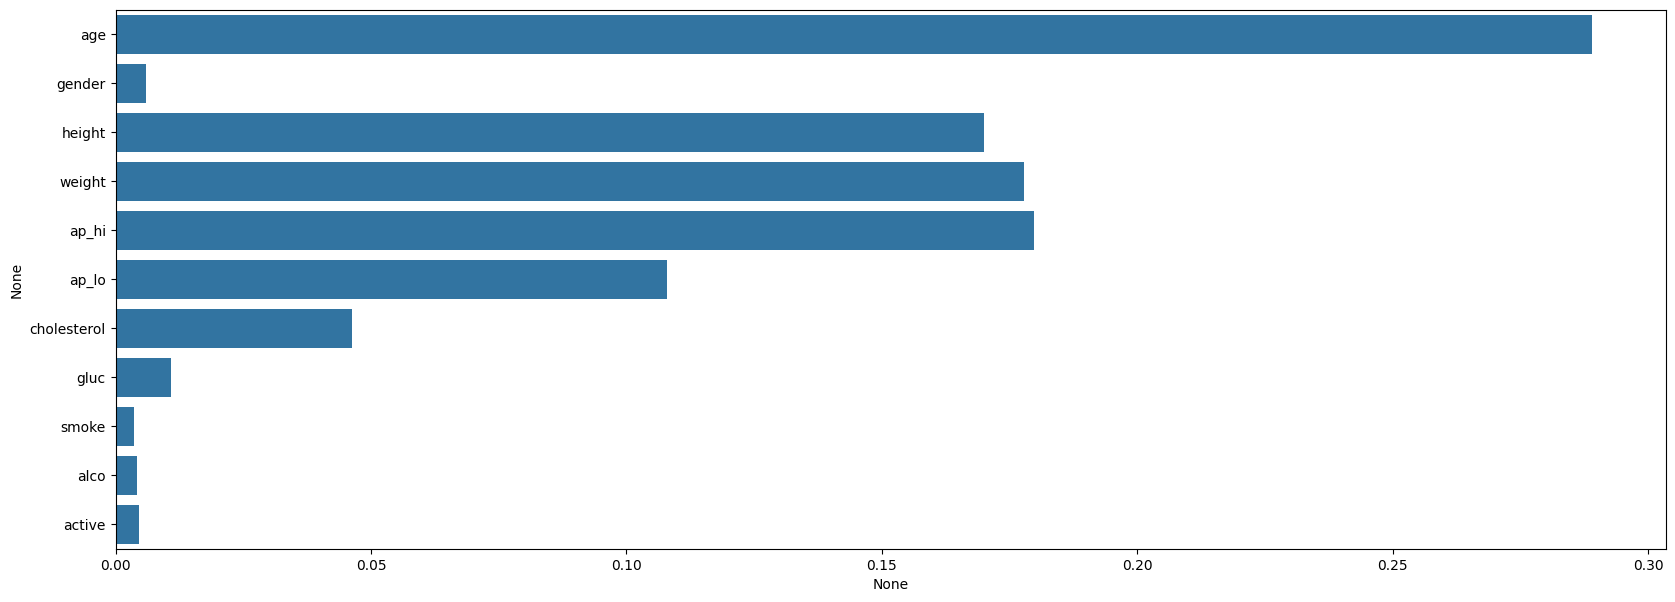

In [ ]:
plt.figure(figsize=(20,7))
sns.barplot(x=top,y=top.index)

In [ ]:
# KNN regressor

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/age_height_weight.csv')

In [ ]:
df.head()

,Age,Height,Weight,Bmi,BmiClass
0,61,1.85,109.30,31.935720,Obese Class 1
1,60,1.71,79.02,27.023700,Overweight
2,60,1.55,74.70,31.092612,Obese Class 1
3,60,1.46,35.90,16.841809,Underweight
4,60,1.58,97.10,38.896010,Obese Class 2


In [ ]:
df=df.drop(columns =['Bmi','BmiClass'])

In [ ]:
df.head()

,Age,Height,Weight
0,61,1.85,109.30
1,60,1.71,79.02
2,60,1.55,74.70
3,60,1.46,35.90
4,60,1.58,97.10


In [ ]:
df.shape

(741, 3)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knn=KNeighborsRegressor(n_neighbors=36)

In [ ]:
x=df.drop(columns=['Weight'])

In [ ]:
y=df.Weight

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=36)

In [ ]:
knn.predict(x_test )

array([78.77222222, 72.39722222, 82.37694444, 55.46111111, 76.04111111,
       74.21194444, 86.47305556, 77.85833333, 76.47275   , 85.77138889,
       67.08111111, 87.46555556, 82.46194444, 64.21388889, 79.52305556,
       76.83138889, 82.01805556, 80.16055556, 82.91333333, 83.52916667,
       76.6575    , 91.0075    , 81.42333333, 78.29361111, 87.51305556,
       67.99611111, 75.72722222, 88.29944444, 76.47466667, 86.68222222,
       84.96472222, 72.39722222, 74.21194444, 75.84805556, 88.00055556,
       86.50305556, 77.72611111, 74.21194444, 60.54444444, 75.845     ,
       60.39444444, 76.26611111, 81.42333333, 88.29944444, 75.72722222,
       78.73669444, 74.00858333, 78.15222222, 77.85833333, 89.3975    ,
       78.17      , 75.9575    , 61.23663889, 84.24361111, 66.09997222,
       85.64194444, 88.68555556, 81.37333333, 82.7075    , 86.30138889,
       54.94222222, 78.66444444, 76.52416667, 71.13941667, 71.53222222,
       78.28391667, 79.60555556, 66.60830556, 76.52416667, 73.34

In [ ]:
y_test

,Weight
120,82.90
196,79.72
335,135.00
581,40.00
394,69.41
...,...
69,36.60
223,79.50
131,78.60
44,74.00


In [ ]:
knn.score(x_test,y_test)

0.10790954848751777

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test,knn.predict(x_test))

0.10790954848751777

In [ ]:
# KNN Classifier

In [ ]:
weather =['sunny','sunny','overcast','rainy','rainy','rainy','overcast','sunny','sunny','rainy','sunny','overcast','overcast','rainy']
temp =['hot','hot','hot','mild','cool','cool','cool','mild','cool','mild','mild','mild','hot','mild']

In [ ]:
play=['no','no','yes','yes','yes','no','yes','no','yes','yes','yes','yes','yes','no']

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder=LabelEncoder()

In [ ]:
weather=encoder.fit_transform(weather)

In [ ]:
temp=encoder.fit_transform(temp)

In [ ]:
play=encoder.fit_transform(play)

In [ ]:
x=list(zip(weather,temp))

In [ ]:
y=play

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
knn.predict(x_test)

array([0, 1, 0])

In [ ]:
knn.score(x_test,y_test)

0.6666666666666666

# CountVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
df=['hello my name is atik','im learning ml now', ' i study in cuet']

In [ ]:
cv=CountVectorizer()

In [ ]:
x_cv=cv.fit_transform(df)

In [ ]:
## cv is used when there is meaningful sectence

In [ ]:
cv.get_feature_names_out()

array(['atik', 'cuet', 'hello', 'im', 'in', 'is', 'learning', 'ml', 'my',
       'name', 'now', 'study'], dtype=object)

In [ ]:
## it will create a column with each unique word

In [ ]:
x_cv.toarray() ## if the word is in the sentences?|

array([[1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0],
       [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1]])

# TF IDF vectorizer


*   TF = term frequency
*   IDF = Inverse doccument frequency



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf=TfidfVectorizer()

In [ ]:
x_tf=tfidf.fit_transform(df)

In [ ]:
x_tf.toarray()

array([[0.4472136 , 0.        , 0.4472136 , 0.        , 0.        ,
        0.4472136 , 0.        , 0.        , 0.4472136 , 0.4472136 ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.5       , 0.        ,
        0.        , 0.5       , 0.5       , 0.        , 0.        ,
        0.5       , 0.        ],
       [0.        , 0.57735027, 0.        , 0.        , 0.57735027,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.57735027]])

# Naive bayes